In [1]:
import pandas as pd 
import numpy as np 
import xarray as xr 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 
from pathlib import Path 
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

cmap_name='nclapcp'
colors = np.asarray([[255,255,255], [211,227,255], [176,202,255], [116,151,255], [103,135,252], [0,162,7], [0,192,50], [175,252,99], [255,249,0], [245,0,0], [203,0,0], [0,0,0] ]) / 255
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=14)

cmap = plt.get_cmap('RdBu_r',14)

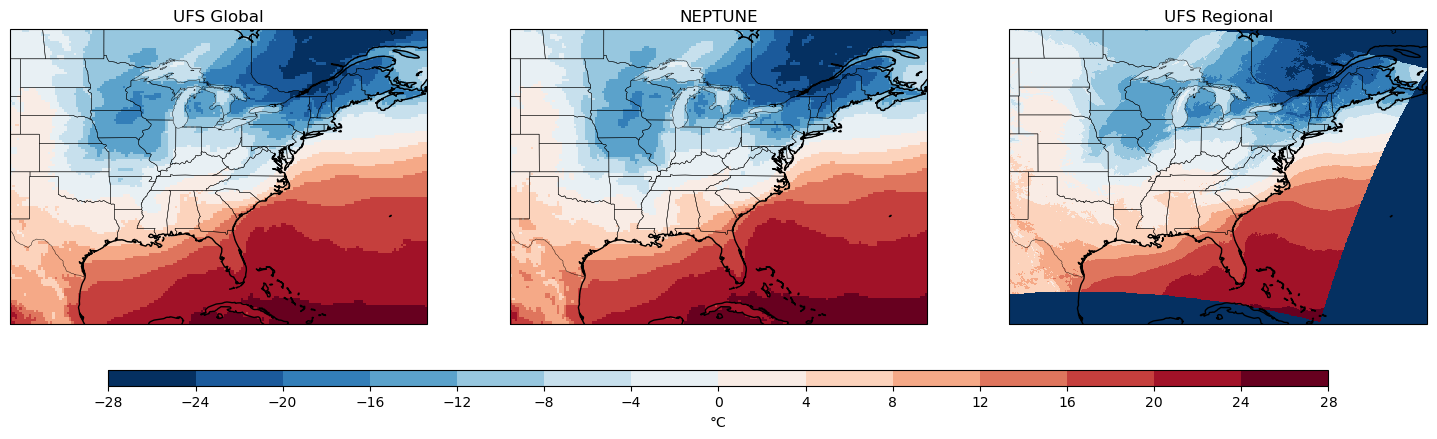

In [2]:
fig = plt.figure(tight_layout=True, figsize=[2.5*6,1.2*6/1.6])
gs = gridspec.GridSpec(12, 12)

ax = [] 
ax.append(fig.add_subplot(gs[:10, :4], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').isel(init=0).plot(ax=ax[0], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')

ax.append(fig.add_subplot(gs[:10, 4:8], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m-273.15
pl = neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').plot(ax=ax[1], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('NEPTUNE')

ax.append(fig.add_subplot(gs[:10, 8:], projection= ccrs.PlateCarree()))
ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m / 3600 -273.15
ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_regional.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(lon=slice(255, 299), lat=slice(21, 52)).mean('step').plot(ax=ax[2], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Regional')


ax.append(fig.add_subplot(gs[11:, 1:-1]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-28,28,15), 'orientation': 'horizontal'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.ufsreg.temp2m.day4.20220113.cbar-bottom.labels.png', dpi=300)

/var/folders/m6/v31d2h_s0tzc6pn_nvz43mrr0000gp/T/ipykernel_37905/3996575401.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.savefig('ufs.neptune.ufsreg.temp2m.day4.20220113.cbar-bottom.nolabels.png', dpi=300)
/Users/khall/miniconda3/envs/xcast6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


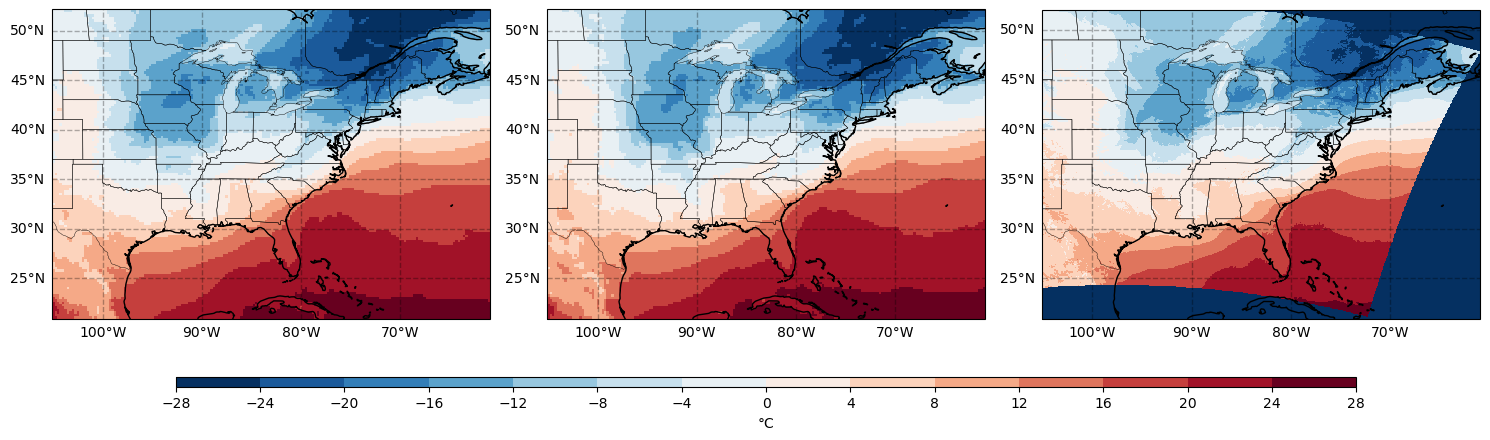

In [3]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(tight_layout=True, figsize=[2.5*6,1.2*6/1.6])
gs = gridspec.GridSpec(12, 12)

ax = [] 
ax.append(fig.add_subplot(gs[:10, :4], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').isel(init=0).plot(ax=ax[0], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-100, -60, 5), ylocs=np.linspace(25,  50, 6),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}



ax.append(fig.add_subplot(gs[:10, 4:8], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m-273.15
pl = neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').plot(ax=ax[1], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-100, -60, 5), ylocs=np.linspace(25,  50, 6), linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[:10, 8:], projection= ccrs.PlateCarree()))
ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m / 3600 -273.15
ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_regional.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(lon=slice(255, 299), lat=slice(21, 52)).mean('step').plot(ax=ax[2], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-100, -60, 5), ylocs=np.linspace(25,  50, 6),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}


ax.append(fig.add_subplot(gs[11:, 1:-1]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-28,28,15), 'orientation': 'horizontal'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.ufsreg.temp2m.day4.20220113.cbar-bottom.nolabels.png', dpi=300)

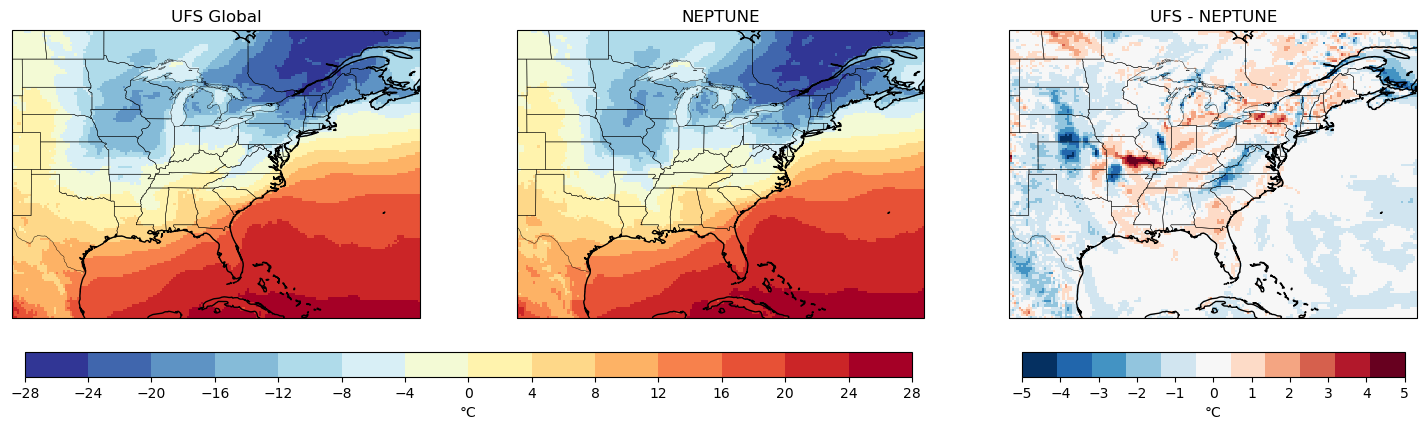

In [4]:
fig = plt.figure( figsize=[3.2*6,1.2*6/1.6])
gs = gridspec.GridSpec(12, 124)
cmap = plt.get_cmap('RdYlBu_r', 14)
ax = [] 
ax.append(fig.add_subplot(gs[:10, :40], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m - 273.15
ufs_global = ufs_global.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').isel(init=0).plot(ax=ax[0], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')

ax.append(fig.add_subplot(gs[:10, 42:82], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m  - 273.15
pl = neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').plot(ax=ax[1], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('NEPTUNE')

ax.append(fig.add_subplot(gs[:10, 82:], projection= ccrs.PlateCarree()))
#ufs_regional = xr.open_dataset('ufs.regional.prateb_avg.nc').tmp2m *24
#ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl2 = (ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step') - neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step')).plot(ax=ax[2], cmap=plt.get_cmap('RdBu_r', 11), vmin=-5, vmax=5,  add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl2.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl2.axes.coastlines()
c = pl2.axes.set_title('UFS - NEPTUNE')


ax.append(fig.add_subplot(gs[11:, 4:78]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-28,28,15), 'orientation': 'horizontal'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)

ax.append(fig.add_subplot(gs[11:, 87:119]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-5,5,11), 'orientation': 'horizontal'}
plt.colorbar(pl2, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.diff.day4.20220113.cbar-bottom.labels.png', dpi=300)


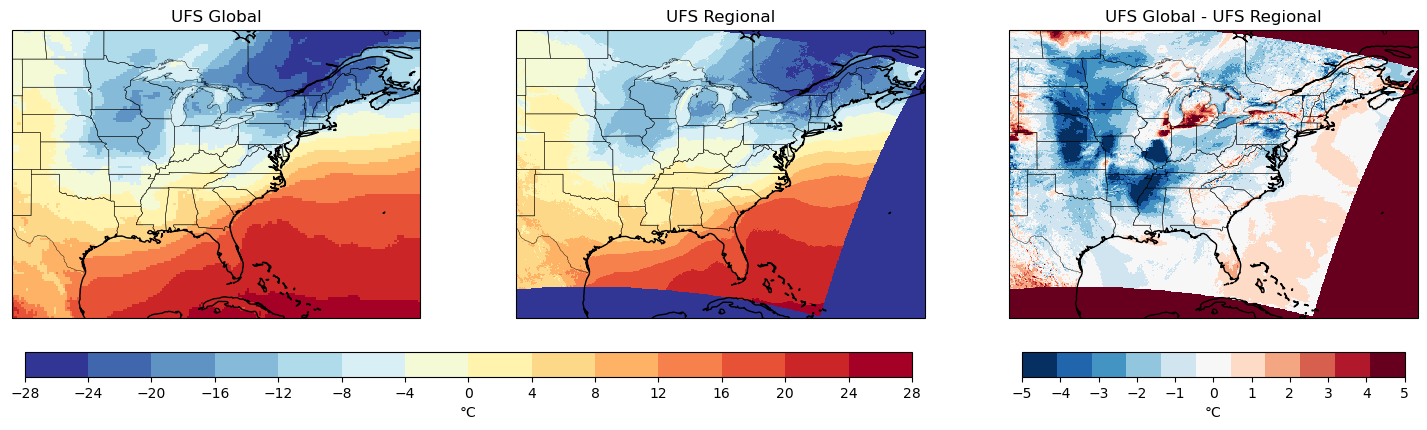

In [5]:
fig = plt.figure( figsize=[3.2*6,1.2*6/1.6])
gs = gridspec.GridSpec(12, 124)
cmap = plt.get_cmap('RdYlBu_r', 14)

ax = [] 
ax.append(fig.add_subplot(gs[:10, :40], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
ufs_global_nib = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(longitude=slice(255-360, 299-360), latitude=slice(21, 52)).mean('step').isel(init=0)
pl = ufs_global_nib.plot(ax=ax[0], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')

ax.append(fig.add_subplot(gs[:10, 42:82], projection= ccrs.PlateCarree()))
ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m/3600 -273.15
ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
ufs_regional_nib = ufs_regional.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).sel(lon=slice(255, 299), lat=slice(21, 52)).mean('step')
ufs_regional_nib = ufs_regional_nib.rename({'lon': 'longitude', 'lat': 'latitude'}).assign_coords({'longitude': [i -360 for i in ufs_regional_nib.coords['lon'].values]})

pl = ufs_regional_nib.plot(ax=ax[1], vmin=-28, vmax=28, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Regional')

ax.append(fig.add_subplot(gs[:10, 82:], projection= ccrs.PlateCarree()))
ufs_global_nib = ufs_global_nib.interp({'longitude': ufs_regional_nib.coords['longitude'].values, 'latitude': ufs_regional_nib.coords['latitude'].values, })

pl2 = (ufs_global_nib - ufs_regional_nib).plot(ax=ax[2], cmap=plt.get_cmap('RdBu_r', 11), vmin=-5, vmax=5,  add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl2.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl2.axes.coastlines()
c = pl2.axes.set_title('UFS Global - UFS Regional')


ax.append(fig.add_subplot(gs[11:, 4:78]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-28,28,15), 'orientation': 'horizontal'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)

ax.append(fig.add_subplot(gs[11:, 87:119]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-5,5,11), 'orientation': 'horizontal'}
plt.colorbar(pl2, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.global-regional.diff.day4.20220113.cbar-bottom.labels.png', dpi=300)


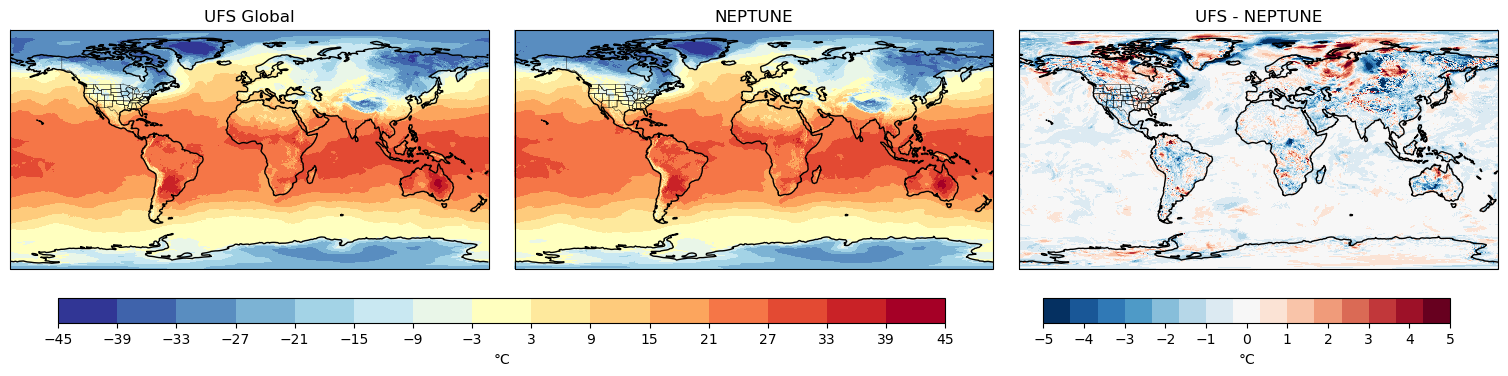

In [6]:
fig = plt.figure( figsize=[3.2*6,1.2*6/1.6])
gs = gridspec.GridSpec(12, 124)

cmap = plt.get_cmap('RdYlBu_r', 15)

ax = [] 
ax.append(fig.add_subplot(gs[:10, :40], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step').isel(init=0).plot(ax=ax[0], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')

ax.append(fig.add_subplot(gs[:10, 42:82], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m -273.15
pl = neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step').plot(ax=ax[1], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('NEPTUNE')

ax.append(fig.add_subplot(gs[:10, 84:124], projection= ccrs.PlateCarree()))
#ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m *24
#ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl2 = (ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step') - neptune_global.sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step')).plot(ax=ax[2], cmap=plt.get_cmap('RdBu_r', 15), vmin=-5, vmax=5,  add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl2.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl2.axes.coastlines()
c = pl2.axes.set_title('UFS - NEPTUNE')


ax.append(fig.add_subplot(gs[10, 4:78]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-45,45,16), 'orientation': 'horizontal'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)

ax.append(fig.add_subplot(gs[10, 86:120]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-5,5,11), 'orientation': 'horizontal'}
plt.colorbar(pl2, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.global.diff.day4.20220113.cbar-bottom.no-labels.png', dpi=300)


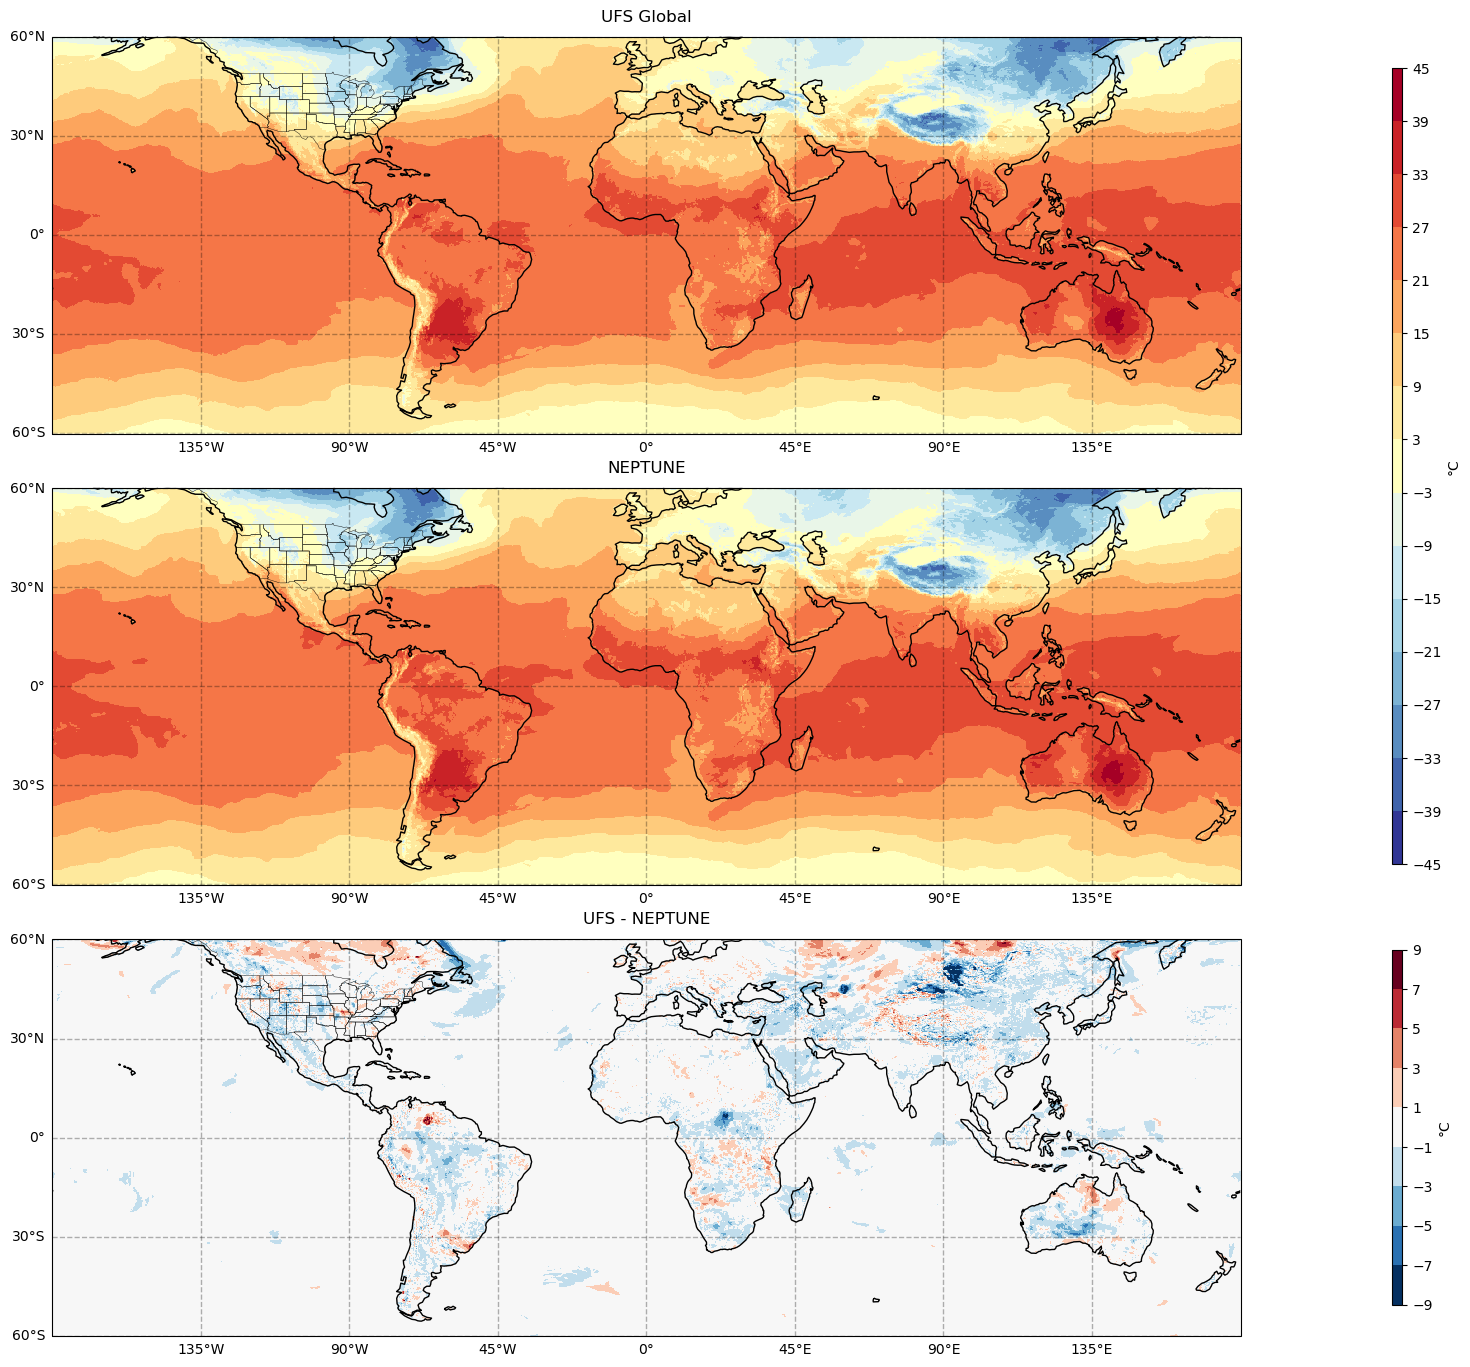

In [7]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure( figsize=[3.2*6,4.5*6/1.6])
gs = gridspec.GridSpec(124, 124)

plt.get_cmap('RdYlBu_r', 16)

ax = [] 
ax.append(fig.add_subplot(gs[:38, :122], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.sel(latitude=slice(-60,60)).assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step').isel(init=0).plot(ax=ax[0], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(-60, 60, 5),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 43:81, :122], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m - 273.15
pl = neptune_global.sel(latitude=slice(-60,60)).sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step').plot(ax=ax[1], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('NEPTUNE')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(-60, 60, 5),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 86:124, :122], projection= ccrs.PlateCarree()))
#ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m *24
#ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl2 = (ufs_global.sel(latitude=slice(-60,60)).sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step') - neptune_global.sel(latitude=slice(-60,60)).sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step')).plot(ax=ax[2], cmap=plt.get_cmap('RdBu_r', 9), vmin=-9, vmax=9,  add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl2.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl2.axes.coastlines()
c = pl2.axes.set_title('UFS - NEPTUNE')
gl = pl2.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(-60, 60, 5),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 3:79, 123:]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-45,45,16), 'orientation': 'vertical'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)

ax.append(fig.add_subplot(gs[ 87:121, 123:]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-9,9,10), 'orientation': 'vertical'}
plt.colorbar(pl2, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.tropics.diff.day4.20220113.cbar-right.labels.latlon.png', dpi=300)


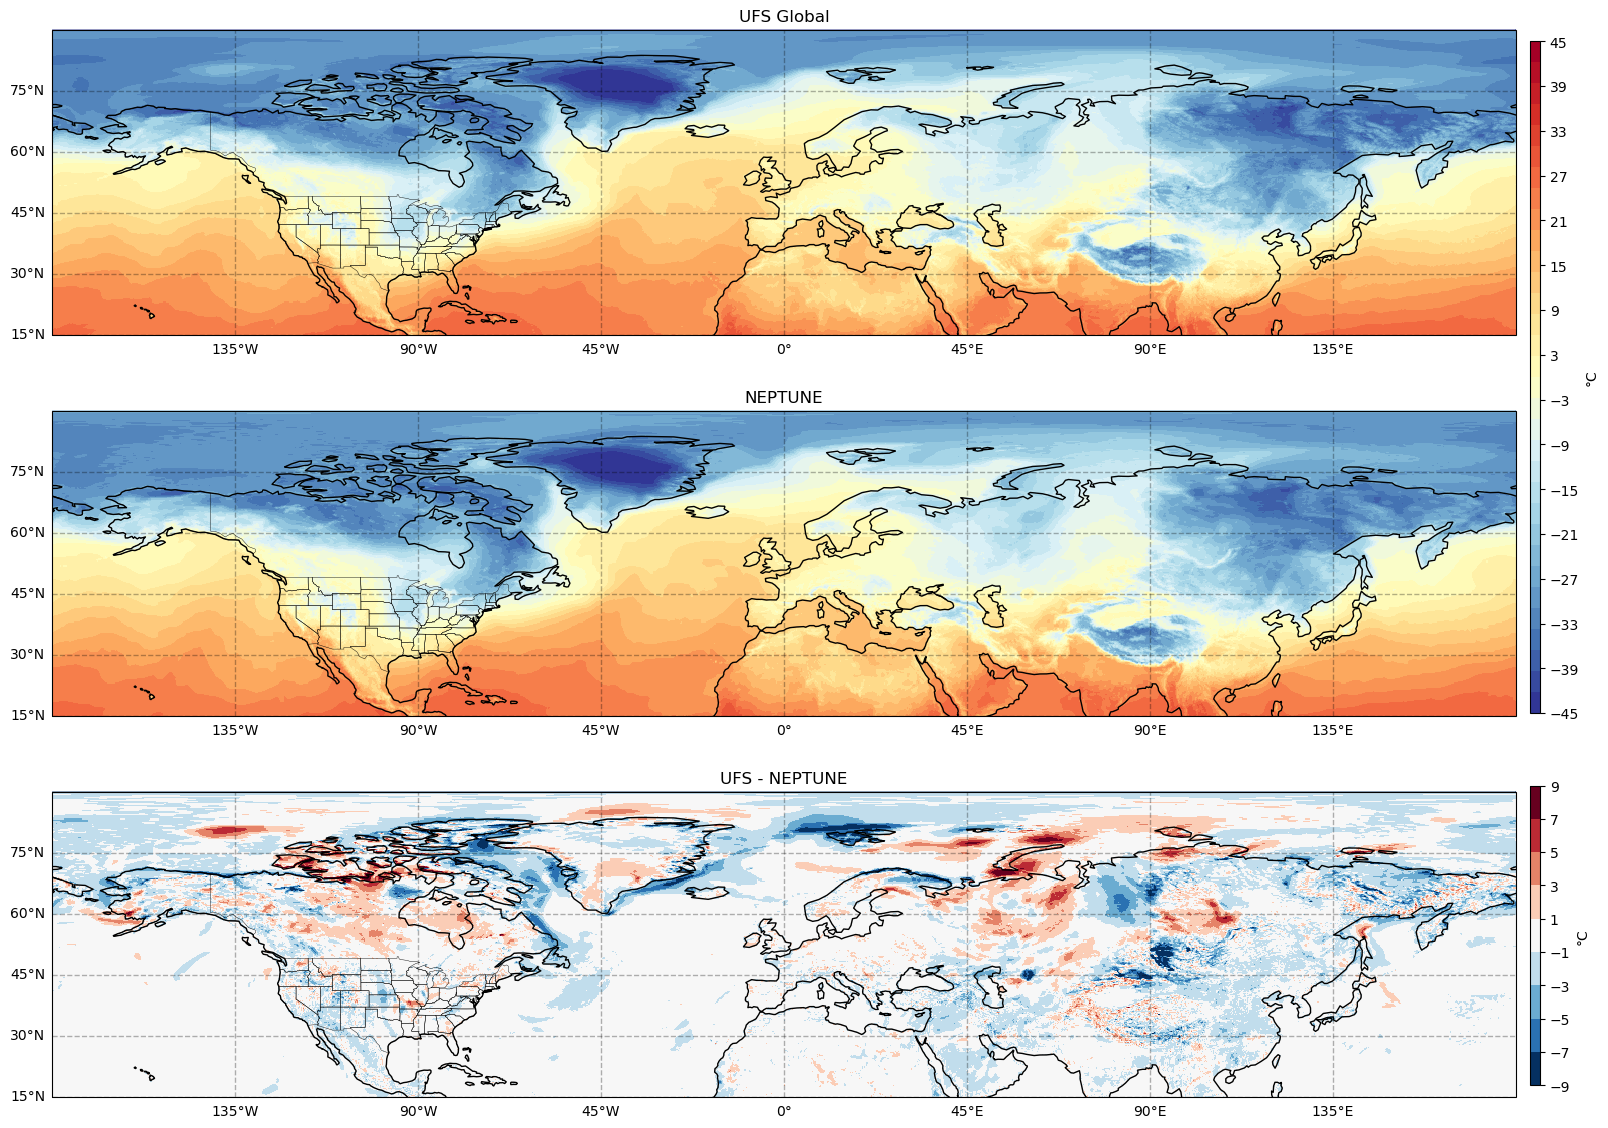

In [8]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure( figsize=[3.2*6,3.8*6/1.6])
gs = gridspec.GridSpec(124, 124)
cmap = plt.get_cmap('RdYlBu_r', 32)

ax = [] 
ax.append(fig.add_subplot(gs[:38, :122], projection=ccrs.PlateCarree()))
ufs_global = xr.open_dataset('ufs.tmp2m.20220113.nc').tmp2m -273.15
ufs_global = ufs_global.sel(latitude=slice(15,90)).assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl = ufs_global.sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step').isel(init=0).plot(ax=ax[0], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('UFS Global')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(15, 90, 6),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 43:81, :122], projection= ccrs.PlateCarree()))
neptune_global = xr.open_dataset('navy.temperature_at_2m.20220113.5day.nc').temperature_at_2m - 273.15
pl = neptune_global.sel(latitude=slice(15,90)).sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step').plot(ax=ax[1], vmin=-45, vmax=45, cmap=cmap, add_colorbar=False)
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('NEPTUNE')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(15, 90, 6),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 86:124, :122], projection= ccrs.PlateCarree()))
#ufs_regional = xr.open_dataset('ufs.regional.tmp2m.nc').tmp2m *24
#ufs_regional = ufs_regional.rename({'time': 'step'}) #.assign_coords({'step': [pd.Timestamp(2022,1,13) + pd.Timedelta(i) for i in ufs_global.coords['step'].values]})
pl2 = (ufs_global.sel(latitude=slice(15,90)).sel(step=slice(pd.Timestamp(2022, 1,16,3), pd.Timestamp(2022,1,17))).mean('step') - neptune_global.sel(latitude=slice(15,90)).sel(step=slice(pd.Timestamp(2022, 1,16,3) - pd.Timestamp(2022,1,13), pd.Timestamp(2022,1,17)- pd.Timestamp(2022,1,13))).mean('step')).plot(ax=ax[2], cmap=plt.get_cmap('RdBu_r', 9), vmin=-9, vmax=9,  add_colorbar=False) #cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl2.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl2.axes.coastlines()
c = pl2.axes.set_title('UFS - NEPTUNE')
gl = pl2.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(15, 90, 6),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}

ax.append(fig.add_subplot(gs[ 3:79, 123:]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-45,45,16), 'orientation': 'vertical'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)

ax.append(fig.add_subplot(gs[ 87:121, 123:]))
cbar_kwargs={'label': '\N{DEGREE SIGN}C', 'ticks': np.linspace(-9,9,10), 'orientation': 'vertical'}
plt.colorbar(pl2, cax=ax[-1], **cbar_kwargs)
plt.savefig('ufs.neptune.tropics.diff.day4.20220113.cbar-right.labels.latlon.png', dpi=300)


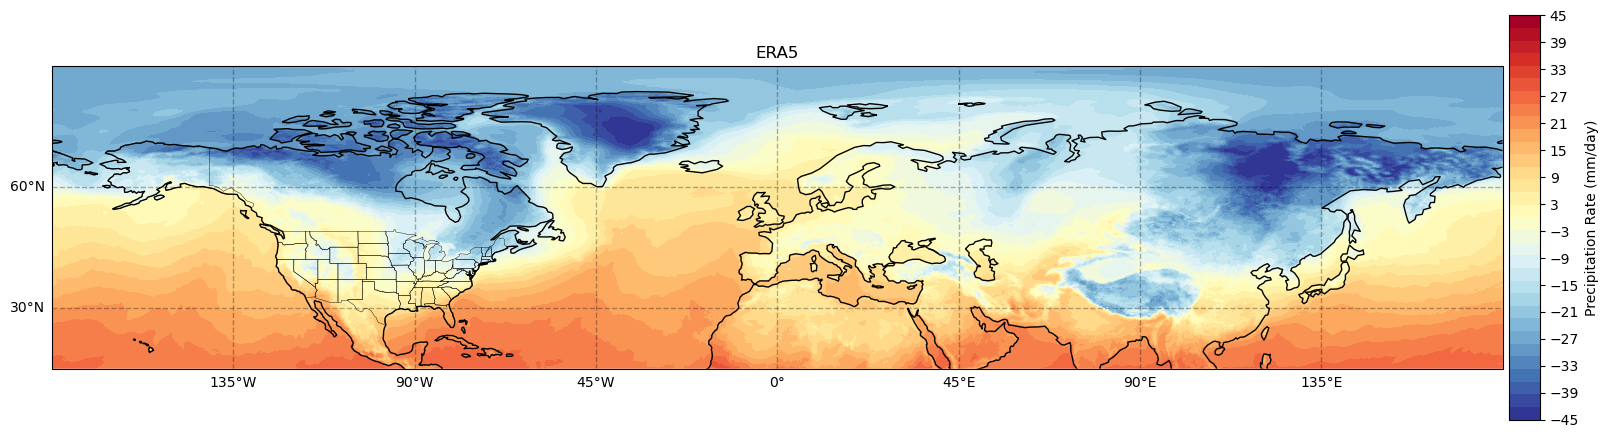

In [84]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure( figsize=[3.2*6, 1.4*6/1.6])
gs = gridspec.GridSpec(80,40)

cmap = plt.get_cmap('RdYlBu_r', 32)

ax = [] 
ax.append(fig.add_subplot(gs[:, :39], projection=ccrs.PlateCarree()))

ds = xr.open_dataset('era5.tmp2m.20220116.nc').air.sel( lat=slice(90,15)) -273.15
pl = ds.plot(ax=ax[-1], cmap=cmap, vmin=-45, vmax=45, add_colorbar=False)# cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(0,70,15)})
f = pl.axes.add_feature(cfeature.STATES, linewidth=0.3)
c = pl.axes.coastlines()
c = pl.axes.set_title('ERA5')
gl = pl.axes.gridlines(crs=ccrs.PlateCarree(), xlocs=np.linspace(-135, 135, 7), ylocs=np.linspace(-60, 60, 5),  linestyle="--", linewidth=1, color='k', alpha=0.3)
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.xlabel_style = {'color': 'black'}
ax.append(fig.add_subplot(gs[ :, 39:40]))
cbar_kwargs={'label': 'Precipitation Rate (mm/day)', 'ticks': np.linspace(-45,45, 16), 'orientation': 'vertical'}
plt.colorbar(pl, cax=ax[-1], **cbar_kwargs)